#EDA on Terrorism dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

<ipython-input-13-dea656a8cc62>:1: DtypeWarning:

Columns (4,31,33,61,62,76,79,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [14]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [15]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Renaming the columns...

In [16]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Taking only reliable columns...

In [20]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [18]:
# Checking for null values
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            113
Region             0
city               1
latitude        1438
longitude       1438
AttackType         1
Killed          5218
Wounded         6925
Target           321
Summary        26614
Group              1
Target_type        1
Weapon_type        1
Motive         26885
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27672 entries, 0 to 27671
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         27672 non-null  int64  
 1   Month        27672 non-null  int64  
 2   Day          27672 non-null  int64  
 3   Country      27672 non-null  object 
 4   state        27559 non-null  object 
 5   Region       27672 non-null  object 
 6   city         27671 non-null  object 
 7   latitude     26234 non-null  float64
 8   longitude    26234 non-null  float64
 9   AttackType   27671 non-null  object 
 10  Killed       22454 non-null  float64
 11  Wounded      20747 non-null  float64
 12  Target       27351 non-null  object 
 13  Summary      1058 non-null   object 
 14  Group        27671 non-null  object 
 15  Target_type  27671 non-null  object 
 16  Weapon_type  27671 non-null  object 
 17  Motive       787 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usa

# DATA VISUALISATION

## Number of Terrorist Activities each Year

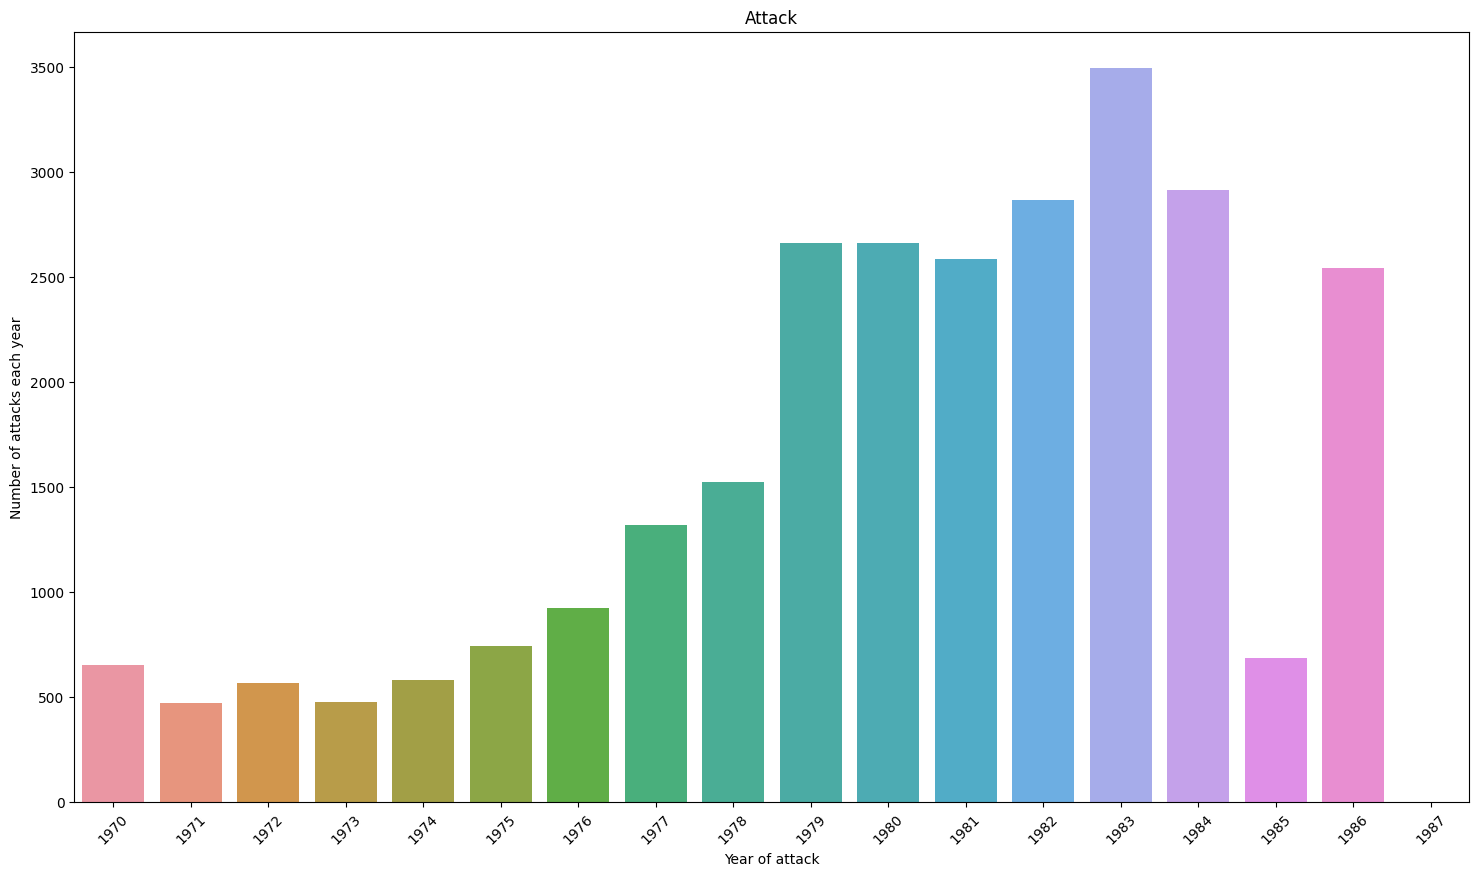

In [23]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years)
plt.xticks(rotation = 45)
plt.xlabel('Year of attack')
plt.ylabel('Number of attacks each year')
plt.title('Attack')
plt.show()

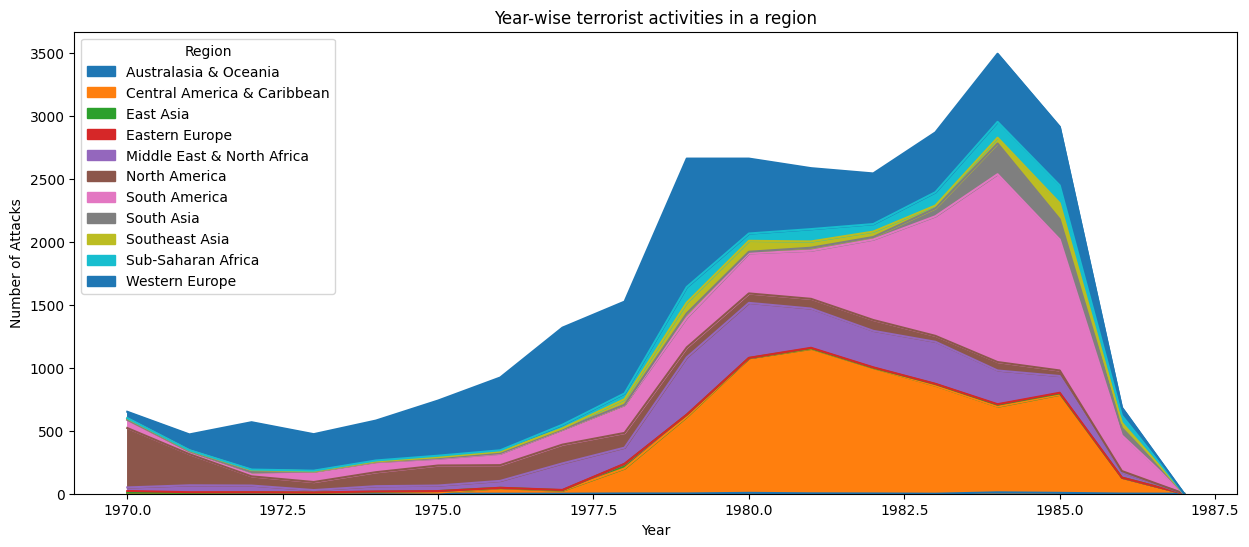

In [26]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Year-wise terrorist activities in a region')
plt.ylabel('Number of Attacks')
plt.show()

# ANALYSIS ON CUSTOMIZED DATA



Terrorist acts in the world over a certain year

In [29]:
import folium
from folium.plugins import MarkerCluster
filterYear = df['Year'] == 1970

In [30]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [31]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

**84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.**